In [3]:
%matplotlib inline


# Lorenz Attractor


This is an example of plotting Edward Lorenz's 1963 `"Deterministic Nonperiodic
Flow"`_ in a 3-dimensional space using mplot3d.

   http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2

<div class="alert alert-info"><h4>Note</h4><p>Because this is a simple non-linear ODE, it would be more easily done using
   SciPy's ODE solver, but this approach depends only upon NumPy.</p></div>


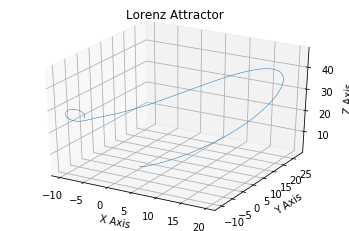

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.0001
num_steps = 13000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show();

In [2]:
u=xs;
v=ys;
w=zs;
t=np.arange(0,1.3001,0.0001,None);
print(len(t))
print(len(u))

13001
13001


In [18]:
l=np.array([t,u,v,w]);

In [19]:
np.save('lorenz.npy',l)

In [20]:
l.shape

(4, 13001)